#Preprocessing and libraries

In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [128]:
df = pd.read_csv('/content/SM_to_dons_incl_cmpgn.csv')
#Removing outlier
df = df.drop([0])
covid_local = pd.read_csv('/content/catalunya_diari_covid.csv')

df = df.join(covid_local['Sum of INGRESSATS_CRITIC'])

FileNotFoundError: ignored

In [ ]:
#Filling null values with 0
df = df.fillna(0)

In [ ]:
#Saving for further exploratory analysis
df.to_excel('/content/SM_to_dons_cov.xlsx')

In [4]:
##-----------Checkpoint-------------------------
df = pd.read_excel('/content/SM_to_dons_cov.xlsx')

In [6]:
#Value for 2020 
df = df[df['date'] > '2019-12-31']

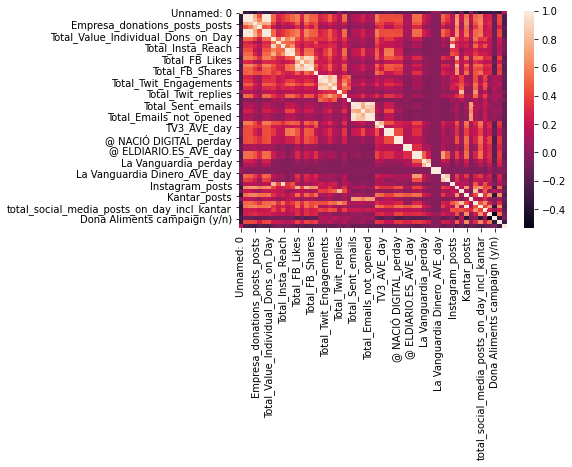

In [7]:
#Printing correlations
corrs= df.corr()
sns.heatmap(corrs)

In [12]:
#Defining dependent/target variables
#Splitting between empresas and individuals as different effect sizes
#of Social Media on them are expected
y_posts = df['Donations_posts']
y_values = df['Total_Value_Dons_on_Day']
y_indiv_posts = df['Individuals_donations_posts_posts']
y_indiv_value = df['Total_Value_Individual_Dons_on_Day']
y_emp_posts = df['Empresa_donations_posts_posts']
y_emp_value = df['Total_Value Empresa_Dons_on_Day']

#Regression donations to all available variables

In [13]:
list(['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Sum of INGRESSATS_CRITIC'])

['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ELDIARIO.ES_perday',
 '@ ELDIARIO.ES_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter

In [14]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)']])

model1 = sm.OLS(y_posts, X).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     29.89
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.03e-88
Time:                        13:45:48   Log-Likelihood:                -2499.8
No. Observations:                 373   AIC:                             5086.
Df Residuals:                     330   BIC:                             5254.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          43.2502     20.662      2.093      0.037       2.605      83.895
Total_Insta_Likes                               2.5527      1.077      2.369      0.018       0.433       4.672
Total_Insta_Comments                          -12.5839      6.799     -1.851      0.065     -25.958       0.791
Total_Insta_Reach                               0.3385      0.176      1.925      0.055      -0.007       0.684
Total_Insta_Follows                            46.9057     34.385      1.364      0.173     -20.735     114.547
Total_Insta_Interactions                       -3.0272      4.301     -0.704      0.482     -11.489       5.434
Total_FB_Likes                                  0.7334      1.059      0.693      0.489      -1.349       2.816
Total_FB_Comments                              21.2310     16.652      1.275      0.203     -11.526      53.988
Total_FB_Reach                                 -0.0341      0.049     -0.696      0.487      -0.131       0.062
Total_FB_Shares                                -4.4640      3.175     -1.406      0.161     -10.710       1.782
Total_FB_Interactions                          -1.1065      0.735     -1.504      0.133      -2.553       0.340
Total_Twit_Likes                                0.2100      4.740      0.044      0.965      -9.115       9.535
Total_Twit_Engagements                          0.0646      0.726      0.089      0.929      -1.364       1.494
Total_Twit_Retweets                             4.5034      5.056      0.891      0.374      -5.444      14.450
Total_Twit_Impressions                          0.0008      0.015      0.052      0.959      -0.030       0.031
Total_Twit_replies                           -112.3513     29.318     -3.832      0.000    -170.025     -54.678
Total_Twit_clicks                              25.6771      4.197      6.118      0.000      17.421      33.933
Total_Twit_hashclicks                         -46.9693     29.109     -1.614      0.108    -104.231      10.293
Total_Sent_emails                               0.1257      0.441      0.285      0.776      -0.741       0.993
Total_Opened_Emails                            -0.1389      0.443     -0.314      0.754      -1.010       0.732
Total_Email_clicks                              0.3798      0.145      2.616      0.009       0.094       0.665
Total_Emails_not_opened                        -0.1138      0.458     -0.249      0.804      -1.014       0.786
Total_Email_soft_bounces                       -0.6794      0.518     -1.312      0.190      -1.698       0.339
TV3_perday                                     76.7446     75.510      1.016      0.310     -71.797     225.286
TV3_AVE_day                                     0.0024     

In [15]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)']])

model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.814
Model:                                 OLS   Adj. R-squared:                  0.790
Method:                      Least Squares   F-statistic:                     34.38
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           1.57e-96
Time:                             13:45:48   Log-Likelihood:                -4017.8
No. Observations:                      373   AIC:                             8122.
Df Residuals:                          330   BIC:                             8290.
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2109.0402   1209.806      1.743      0.082    -270.864    4488.945
Total_Insta_Likes                             168.2133     63.084      2.666      0.008      44.116     292.311
Total_Insta_Comments                         -899.4369    398.090     -2.259      0.025   -1682.551    -116.323
Total_Insta_Reach                              22.5203     10.296      2.187      0.029       2.266      42.774
Total_Insta_Follows                          3722.2498   2013.338      1.849      0.065    -238.346    7682.846
Total_Insta_Interactions                     -320.8433    251.860     -1.274      0.204    -816.296     174.610
Total_FB_Likes                                -39.4060     61.993     -0.636      0.525    -161.358      82.546
Total_FB_Comments                             581.2823    975.019      0.596      0.551   -1336.754    2499.318
Total_FB_Reach                                 -0.7956      2.874     -0.277      0.782      -6.450       4.859
Total_FB_Shares                              -160.6423    185.914     -0.864      0.388    -526.368     205.083
Total_FB_Interactions                         -66.4317     43.066     -1.543      0.124    -151.149      18.286
Total_Twit_Likes                             -282.1774    277.561     -1.017      0.310    -828.190     263.835
Total_Twit_Engagements                          9.4587     42.535      0.222      0.824     -74.214      93.132
Total_Twit_Retweets                           452.3467    296.072      1.528      0.128    -130.081    1034.774
Total_Twit_Impressions                          1.0063      0.905      1.112      0.267      -0.774       2.786
Total_Twit_replies                          -5902.4906   1716.655     -3.438      0.001   -9279.458   -2525.523
Total_Twit_clicks                            1299.6490    245.732      5.289      0.000     816.251    1783.047
Total_Twit_hashclicks                       -2627.1866   1704.399     -1.541      0.124   -5980.044     725.671
Total_Sent_emails                               0.4122     25.809      0.016      0.987     -50.359      51.184
Total_Opened_Emails                            -1.1802     25.921     -0.046      0.964     -52.171      49.811
Total_Email_clicks                             28.7327      8.499      3.381      0.001      12.014      45.452
Total_Emails_not_opened                         0.9076     26.792      0.034      0.973     -51.797      53.612
Total_Email_soft_bounces                      -54.1549     30.318     -1.786      0.075    -113.796       5.486
TV3_perday                                  -2216.8881   4421.330     -0.501      0.616   -1.09e+04    6480.659
TV3_

In [16]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.792
Model:                                           OLS   Adj. R-squared:                  0.765
Method:                                Least Squares   F-statistic:                     29.08
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           6.27e-88
Time:                                       13:45:48   Log-Likelihood:                -2497.2
No. Observations:                                373   AIC:                             5082.
Df Residuals:                                    329   BIC:                             5255.
Df Model:                                         43                                         
Covariance Type:                           nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          55.9777     25.936      2.158      0.032       4.957     106.999
Total_Insta_Likes                               2.5709      1.073      2.395      0.017       0.459       4.682
Total_Insta_Comments                          -12.1286      6.771     -1.791      0.074     -25.449       1.192
Total_Insta_Reach                               0.3199      0.175      1.824      0.069      -0.025       0.665
Total_Insta_Follows                            47.9483     34.260      1.400      0.163     -19.449     115.346
Total_Insta_Interactions                       -3.0461      4.284     -0.711      0.478     -11.473       5.381
Total_FB_Likes                                  0.7905      1.054      0.750      0.454      -1.283       2.864
Total_FB_Comments                              21.3524     16.570      1.289      0.198     -11.245      53.950
Total_FB_Reach                                 -0.0357      0.049     -0.730      0.466      -0.132       0.060
Total_FB_Shares                                -4.4746      3.159     -1.417      0.158     -10.688       1.739
Total_FB_Interactions                          -1.0562      0.732     -1.443      0.150      -2.496       0.384
Total_Twit_Likes                                0.1939      4.716      0.041      0.967      -9.084       9.472
Total_Twit_Engagements                          0.0873      0.723      0.121      0.904      -1.335       1.510
Total_Twit_Retweets                             4.5843      5.034      0.911      0.363      -5.319      14.488
Total_Twit_Impressions                         -0.0003      0.015     -0.021      0.983      -0.031       0.030
Total_Twit_replies                           -111.0775     29.183     -3.806      0.000    -168.486     -53.669
Total_Twit_clicks                              25.6799      4.175      6.151      0.000      17.467      33.892
Total_Twit_hashclicks                         -46.2063     28.959     -1.596      0.112    -103.174      10.762
Total_Sent_emails                               0.0872      0.440      0.198      0.843      -0.778       0.952
Total_Opened_Emails                            -0.1004      0.442     -0.227      0.820      -0.969       0.769
Total_Email_clicks                              0.3770      0.144      2.609      0.009       0.093       0.661
Total_Emails_not_opened                        -0.0739      0.457     -0.162      0.872      -0.972       0.824
Total_Email_soft_bounces                       -0.6724      0.515     -1.305      0.193      -1.686       0.341
TV3_pe

In [17]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.807
Model:                                            OLS   Adj. R-squared:                  0.781
Method:                                 Least Squares   F-statistic:                     31.93
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           4.35e-93
Time:                                        13:45:48   Log-Likelihood:                -4003.3
No. Observations:                                 373   AIC:                             8095.
Df Residuals:                                     329   BIC:                             8267.
Df Model:                                          43                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2567.9830   1470.597      1.746      0.082    -324.977    5460.943
Total_Insta_Likes                             172.1907     60.861      2.829      0.005      52.465     291.916
Total_Insta_Comments                         -839.2364    383.949     -2.186      0.030   -1594.540     -83.932
Total_Insta_Reach                              18.8367      9.944      1.894      0.059      -0.726      38.399
Total_Insta_Follows                          3556.2248   1942.616      1.831      0.068    -265.292    7377.741
Total_Insta_Interactions                     -268.2305    242.896     -1.104      0.270    -746.055     209.594
Total_FB_Likes                                  7.5169     59.771      0.126      0.900    -110.064     125.098
Total_FB_Comments                             733.7875    939.568      0.781      0.435   -1114.532    2582.107
Total_FB_Reach                                 -1.8109      2.770     -0.654      0.514      -7.260       3.638
Total_FB_Shares                              -160.8389    179.095     -0.898      0.370    -513.154     191.477
Total_FB_Interactions                         -52.5958     41.504     -1.267      0.206    -134.242      29.050
Total_Twit_Likes                             -180.3633    267.427     -0.674      0.501    -706.447     345.720
Total_Twit_Engagements                          7.9442     41.001      0.194      0.846     -72.713      88.602
Total_Twit_Retweets                           379.2349    285.444      1.329      0.185    -182.290     940.760
Total_Twit_Impressions                          0.6484      0.874      0.742      0.459      -1.070       2.367
Total_Twit_replies                          -5724.2125   1654.706     -3.459      0.001   -8979.351   -2469.074
Total_Twit_clicks                            1363.2254    236.714      5.759      0.000     897.561    1828.890
Total_Twit_hashclicks                       -2527.4918   1642.014     -1.539      0.125   -5757.662     702.679
Total_Sent_emails                              -2.9714     24.938     -0.119      0.905     -52.030      46.087
Total_Opened_Emails                             2.3435     25.045      0.094      0.926     -46.924      51.611
Total_Email_clicks                             24.5500      8.191      2.997      0.003       8.436      40.664
Total_Emails_not_opened                         4.2775     25.890      0.165      0.869     -46.653      55.208
Total_Email_soft_bounces                      -47.5779     29.212     -1.629      0.104    -105.045       9

In [18]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day',
       'La Vanguardia_perday', 'La Vanguardia_AVE_day',
       'La Vanguardia Dinero_perday', 'La Vanguardia Dinero_AVE_day',
       'La Vanguardia Vivir_perday', 'La Vanguardia Vivir_AVE_day',
       'Instagram_posts', 'Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar',
       'total_social_media_posts_on_day_incl_kantar',
       'Social_Media_post_Y/N_excl_kantar',
       'Social_Media_post_Y/N_incl_kantar',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.653
Model:                                         OLS   Adj. R-squared:                  0.607
Method:                              Least Squares   F-statistic:                     14.38
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           4.31e-53
Time:                                     13:45:48   Log-Likelihood:                -3290.6
No. Observations:                              373   AIC:                             6669.
Df Residuals:                                  329   BIC:                             6842.
Df Model:                                       43                                         
Covariance Type:                         nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                         337.4762    217.598      1.551      0.122     -90.583     765.536
Total_Insta_Likes                              -0.9920      9.005     -0.110      0.912     -18.707      16.723
Total_Insta_Comments                          -43.2365     56.811     -0.761      0.447    -154.996      68.523
Total_Insta_Reach                               3.0422      1.471      2.068      0.039       0.148       5.937
Total_Insta_Follows                           265.0287    287.441      0.922      0.357    -300.426     830.483
Total_Insta_Interactions                      -63.0341     35.940     -1.754      0.080    -133.736       7.668
Total_FB_Likes                                -44.6738      8.844     -5.051      0.000     -62.072     -27.276
Total_FB_Comments                            -175.2644    139.024     -1.261      0.208    -448.753      98.224
Total_FB_Reach                                  0.9414      0.410      2.297      0.022       0.135       1.748
Total_FB_Shares                                 1.6488     26.500      0.062      0.950     -50.482      53.780
Total_FB_Interactions                         -12.7136      6.141     -2.070      0.039     -24.794      -0.633
Total_Twit_Likes                             -106.7459     39.570     -2.698      0.007    -184.588     -28.903
Total_Twit_Engagements                          2.8694      6.067      0.473      0.637      -9.065      14.804
Total_Twit_Retweets                            83.5525     42.236      1.978      0.049       0.466     166.639
Total_Twit_Impressions                          0.3059      0.129      2.367      0.019       0.052       0.560
Total_Twit_replies                           -125.1561    244.840     -0.511      0.610    -606.806     356.494
Total_Twit_clicks                             -62.1522     35.026     -1.774      0.077    -131.055       6.750
Total_Twit_hashclicks                         -77.1915    242.962     -0.318      0.751    -555.147     400.764
Total_Sent_emails                               1.6478      3.690      0.447      0.655      -5.611       8.907
Total_Opened_Emails                            -1.7970      3.706     -0.485      0.628      -9.087       5.493
Total_Email_clicks                              4.4211      1.212      3.648      0.000       2.037       6.805
Total_Emails_not_opened                        -1.5494      3.831     -0.404      0.686      -9.085       5.987
Total_Email_soft_bounces                       -7.1665      4.322     -1.658      0.098     -15.670       1.337
TV3_perday                  

In [19]:
list(model1.pvalues)

[0.12188371307200992,
 0.9123477103717496,
 0.44717021391177414,
 0.039465762649660244,
 0.3571896436988733,
 0.0803864901174577,
 7.288655672268162e-07,
 0.20831875797967656,
 0.022251830136945764,
 0.9504252500587795,
 0.03920984599249335,
 0.007343310289871653,
 0.6365544827641254,
 0.048736470943095064,
 0.01851738160068229,
 0.6095716903331301,
 0.07690921367328477,
 0.7509064662737173,
 0.6554812992895231,
 0.6280543604074743,
 0.0003075750577137981,
 0.6861449324744391,
 0.09827389776560393,
 0.00012053126481522959,
 4.058823222225998e-06,
 0.24070183185903676,
 0.2407012237416859,
 0.8848943001789493,
 0.8848939143853696,
 0.11537608945483437,
 0.11538383102644037,
 0.07908154926400307,
 0.07908107669117924,
 0.0011785860063887646,
 0.006723187089711065,
 0.9731509722835199,
 0.9731505215692513,
 4.901553014788473e-06,
 6.304322199575333e-10,
 0.016897680457297556,
 4.202960237053863e-14,
 0.6054390267830974,
 0.5875259867398417,
 0.38233631457549777,
 0.5309202188031035,
 0.47

# Relation To Donations

In [20]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'Donations_posts',
       'Total_Value_Dons_on_Day', 'Empresa_donations_posts_posts',
       'Total_Value Empresa_Dons_on_Day', 'Individuals_donations_posts_posts',
       'Total_Value_Individual_Dons_on_Day', 'Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
       'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ EL

##Instagram

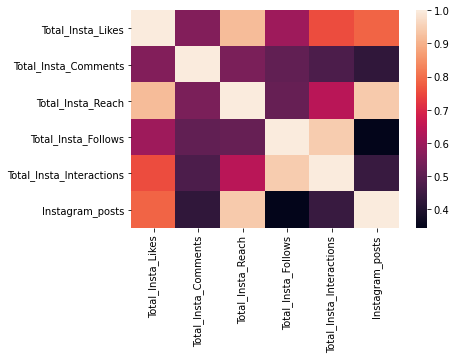

In [21]:
corrs = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Instagram_posts']].corr()

sns.heatmap(corrs)

In [22]:
#-------Instagram--------
#General post counts
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     55.49
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.36e-36
Time:                        13:45:49   Log-Likelihood:                -2704.4
No. Observations:                 373   AIC:                             5419.
Df Residuals:                     368   BIC:                             5439.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       91.9896     18.745      4.908      0.000      55.129     128.850
Total_Insta_Likes            9.5455      1.155      8.264      0.000       7.274      11.817
Total_Insta_Comments         3.3250      7.669      0.434      0.665     -11.756      18.406
Total_Insta_Reach           -0.6563      0.095     -6.907      0.000      -0.843      -0.469
Total_Insta_Interactions     5.0616      1.728      2.928      0.004       1.663       8.460
==============================================================================
Omnibus:                      625.548   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           254893.634
Skew:                           9.414   Prob(JB):                         0.00
Kurtosis:                     129.673   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#General donation value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.364
Model:                                 OLS   Adj. R-squared:                  0.357
Method:                      Least Squares   F-statistic:                     52.71
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           4.33e-35
Time:                             13:45:49   Log-Likelihood:                -4247.0
No. Observations:                      373   AIC:                             8504.
Df Residuals:                          368   BIC:                             8524.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5754.5608   1172.088      4.910      0.000    3449.730    8059.392
Total_Insta_Likes          574.9289     72.223      7.960      0.000     432.906     716.951
Total_Insta_Comments      -100.6663    479.541     -0.210      0.834   -1043.651     842.318
Total_Insta_Reach          -37.8454      5.942     -6.370      0.000     -49.529     -26.162
Total_Insta_Interactions   312.8891    108.078      2.895      0.004     100.361     525.417
==============================================================================
Omnibus:                      564.755   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125165.191
Skew:                           7.907   Prob(JB):                         0.00
Kurtosis:                      91.337   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Individual Donation count
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.377
Model:                                           OLS   Adj. R-squared:                  0.370
Method:                                Least Squares   F-statistic:                     55.62
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           1.15e-36
Time:                                       13:45:49   Log-Likelihood:                -2701.6
No. Observations:                                373   AIC:                             5413.
Df Residuals:                                    368   BIC:                             5433.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       90.6705     18.604      4.874      0.000      54.087     127.254
Total_Insta_Likes            9.4617      1.146      8.254      0.000       7.207      11.716
Total_Insta_Comments         3.4923      7.611      0.459      0.647     -11.475      18.460
Total_Insta_Reach           -0.6521      0.094     -6.915      0.000      -0.838      -0.467
Total_Insta_Interactions     5.0774      1.715      2.960      0.003       1.704       8.451
==============================================================================
Omnibus:                      627.535   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259954.745
Skew:                           9.469   Prob(JB):                         0.00
Kurtosis:                     130.936   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Individual Donation value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.382
Model:                                            OLS   Adj. R-squared:                  0.375
Method:                                 Least Squares   F-statistic:                     56.81
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           2.65e-37
Time:                                        13:45:49   Log-Likelihood:                -4220.1
No. Observations:                                 373   AIC:                             8450.
Df Residuals:                                     368   BIC:                             8470.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5264.6679   1090.500      4.828      0.000    3120.275    7409.060
Total_Insta_Likes          546.6026     67.196      8.134      0.000     414.466     678.739
Total_Insta_Comments        10.7298    446.160      0.024      0.981    -866.614     888.074
Total_Insta_Reach          -37.0591      5.528     -6.704      0.000     -47.929     -26.189
Total_Insta_Interactions   328.0472    100.555      3.262      0.001     130.313     525.781
==============================================================================
Omnibus:                      584.930   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162100.902
Skew:                           8.372   Prob(JB):                         0.00
Kurtosis:                     103.746   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Organization Donation count
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.201
Model:                                       OLS   Adj. R-squared:                  0.192
Method:                            Least Squares   F-statistic:                     23.10
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           4.77e-17
Time:                                   13:45:49   Log-Likelihood:                -1012.9
No. Observations:                            373   AIC:                             2036.
Df Residuals:                                368   BIC:                             2055.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3191      0.201      6.561      0.000       0.924       1.714
Total_Insta_Likes            0.0838      0.012      6.767      0.000       0.059       0.108
Total_Insta_Comments        -0.1674      0.082     -2.035      0.043      -0.329      -0.006
Total_Insta_Reach           -0.0042      0.001     -4.136      0.000      -0.006      -0.002
Total_Insta_Interactions    -0.0159      0.019     -0.855      0.393      -0.052       0.021
==============================================================================
Omnibus:                      424.317   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25065.313
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.838   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Organization Donation value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.064
Model:                                         OLS   Adj. R-squared:                  0.054
Method:                              Least Squares   F-statistic:                     6.327
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           6.22e-05
Time:                                     13:45:49   Log-Likelihood:                -3475.4
No. Observations:                              373   AIC:                             6961.
Df Residuals:                                  368   BIC:                             6980.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      489.8929    148.088      3.308      0.001     198.689     781.097
Total_Insta_Likes           28.3263      9.125      3.104      0.002      10.382      46.270
Total_Insta_Comments      -111.3961     60.588     -1.839      0.067    -230.538       7.745
Total_Insta_Reach           -0.7863      0.751     -1.047      0.296      -2.262       0.690
Total_Insta_Interactions   -15.1580     13.655     -1.110      0.268     -42.010      11.694
==============================================================================
Omnibus:                      618.825   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191116.477
Skew:                           9.361   Prob(JB):                         0.00
Kurtosis:                     112.300   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Facebook

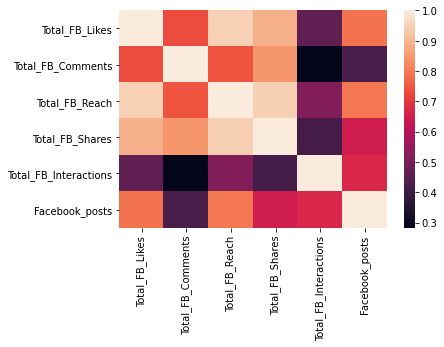

In [28]:
#Check for multicollinearity and deleting highly correlated variables
corrs = df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions','Facebook_posts']].corr()

sns.heatmap(corrs)

In [29]:
#-------Facebook--------
#General Posts counts
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     73.13
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.49e-45
Time:                        13:45:49   Log-Likelihood:                -2683.4
No. Observations:                 373   AIC:                             5377.
Df Residuals:                     368   BIC:                             5396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    60.2945     17.363      3.473      0.001      26.152      94.437
Total_FB_Likes            3.0910      1.315      2.351      0.019       0.505       5.677
Total_FB_Comments       -65.6811     12.469     -5.267      0.000     -90.201     -41.161
Total_FB_Reach            0.1411      0.041      3.430      0.001       0.060       0.222
Total_FB_Interactions     3.0704      0.752      4.082      0.000       1.591       4.549
==============================================================================
Omnibus:                      442.649   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64477.249
Skew:                           5.064   Prob(JB):                         0.00
Kurtosis:                      66.609   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#General donation value
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.477
Model:                                 OLS   Adj. R-squared:                  0.471
Method:                      Least Squares   F-statistic:                     83.79
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           1.61e-50
Time:                             13:45:49   Log-Likelihood:                -4210.8
No. Observations:                      373   AIC:                             8432.
Df Residuals:                          368   BIC:                             8451.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3685.7310   1042.305      3.536      0.000    1636.109    5735.353
Total_FB_Likes          143.2259     78.938      1.814      0.070     -12.000     298.452
Total_FB_Comments     -4490.7020    748.543     -5.999      0.000   -5962.660   -3018.744
Total_FB_Reach           10.4499      2.470      4.231      0.000       5.593      15.306
Total_FB_Interactions   222.2143     45.153      4.921      0.000     133.423     311.005
==============================================================================
Omnibus:                      350.734   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26252.141
Skew:                           3.559   Prob(JB):                         0.00
Kurtosis:                      43.478   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Individual Donation count
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.442
Model:                                           OLS   Adj. R-squared:                  0.436
Method:                                Least Squares   F-statistic:                     72.75
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           2.27e-45
Time:                                       13:45:50   Log-Likelihood:                -2681.2
No. Observations:                                373   AIC:                             5372.
Df Residuals:                                    368   BIC:                             5392.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    59.2582     17.260      3.433      0.001      25.318      93.199
Total_FB_Likes            3.0537      1.307      2.336      0.020       0.483       5.624
Total_FB_Comments       -64.7919     12.395     -5.227      0.000     -89.167     -40.417
Total_FB_Reach            0.1401      0.041      3.425      0.001       0.060       0.220
Total_FB_Interactions     3.0403      0.748      4.066      0.000       1.570       4.511
==============================================================================
Omnibus:                      444.533   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65574.032
Skew:                           5.099   Prob(JB):                         0.00
Kurtosis:                      67.150   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#Individual Donation value
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.463
Model:                                            OLS   Adj. R-squared:                  0.458
Method:                                 Least Squares   F-statistic:                     79.43
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           1.58e-48
Time:                                        13:45:50   Log-Likelihood:                -4193.7
No. Observations:                                 373   AIC:                             8397.
Df Residuals:                                     368   BIC:                             8417.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3369.4678    995.814      3.384      0.001    1411.267    5327.668
Total_FB_Likes          141.3710     75.417      1.875      0.062      -6.932     289.673
Total_FB_Comments     -4060.5656    715.155     -5.678      0.000   -5466.869   -2654.263
Total_FB_Reach            9.6353      2.360      4.084      0.000       4.995      14.275
Total_FB_Interactions   192.1680     43.139      4.455      0.000     107.337     276.998
==============================================================================
Omnibus:                      376.482   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34687.660
Skew:                           3.938   Prob(JB):                         0.00
Kurtosis:                      49.582   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Organization Donation count
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.374
Model:                                       OLS   Adj. R-squared:                  0.368
Method:                            Least Squares   F-statistic:                     55.05
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           2.33e-36
Time:                                   13:45:50   Log-Likelihood:                -967.17
No. Observations:                            373   AIC:                             1944.
Df Residuals:                                368   BIC:                             1964.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0363      0.174      5.944      0.000       0.693       1.379
Total_FB_Likes            0.0373      0.013      2.825      0.005       0.011       0.063
Total_FB_Comments        -0.8892      0.125     -7.102      0.000      -1.135      -0.643
Total_FB_Reach            0.0011      0.000      2.586      0.010       0.000       0.002
Total_FB_Interactions     0.0301      0.008      3.988      0.000       0.015       0.045
==============================================================================
Omnibus:                      354.450   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17164.857
Skew:                           3.812   Prob(JB):                         0.00
Kurtosis:                      35.347   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Organization Donation value
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.243
Model:                                         OLS   Adj. R-squared:                  0.235
Method:                              Least Squares   F-statistic:                     29.51
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           2.68e-21
Time:                                     13:45:50   Log-Likelihood:                -3435.9
No. Observations:                              373   AIC:                             6882.
Df Residuals:                                  368   BIC:                             6901.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   316.2632    130.565      2.422      0.016      59.515     573.011
Total_FB_Likes            1.8550      9.888      0.188      0.851     -17.590      21.300
Total_FB_Comments      -430.1364     93.767     -4.587      0.000    -614.523    -245.750
Total_FB_Reach            0.8146      0.309      2.633      0.009       0.206       1.423
Total_FB_Interactions    30.0463      5.656      5.312      0.000      18.924      41.169
==============================================================================
Omnibus:                      514.626   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85388.762
Skew:                           6.701   Prob(JB):                         0.00
Kurtosis:                      75.901   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
list(model1.params)

[316.26323405769926,
 1.8549550160426058,
 -430.13638624412226,
 0.8145834875482934,
 30.046318112908562]

##Twitter

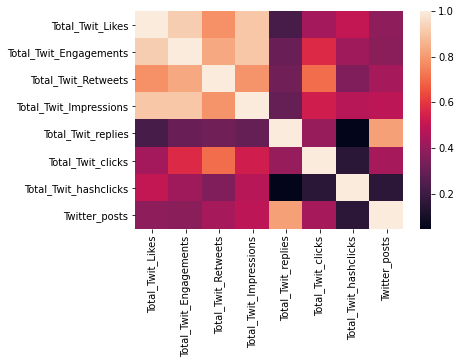

In [36]:
corrs = df[['Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Twitter_posts']].corr()

sns.heatmap(corrs)

In [37]:
#-------Twitter--------
#General Posts counts
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     38.63
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           5.37e-27
Time:                        13:45:50   Log-Likelihood:                -2727.1
No. Observations:                 373   AIC:                             5464.
Df Residuals:                     368   BIC:                             5484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    67.9030     20.016      3.392      0.001      28.543     107.263
Total_Twit_Likes          6.2143      2.398      2.591      0.010       1.498      10.931
Total_Twit_replies      -35.2690     22.993     -1.534      0.126     -80.484       9.945
Total_Twit_clicks        49.2079      4.992      9.857      0.000      39.391      59.025
Total_Twit_hashclicks  -142.1871     48.058     -2.959      0.003    -236.690     -47.684
==============================================================================
Omnibus:                      405.723   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23746.917
Skew:                           4.719   Prob(JB):                         0.00
Kurtosis:                      40.933   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#General donation value
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.273
Model:                                 OLS   Adj. R-squared:                  0.265
Method:                      Least Squares   F-statistic:                     34.51
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           1.80e-24
Time:                             13:45:50   Log-Likelihood:                -4272.1
No. Observations:                      373   AIC:                             8554.
Df Residuals:                          368   BIC:                             8574.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4496.0365   1259.780      3.569      0.000    2018.766    6973.307
Total_Twit_Likes        367.8907    150.955      2.437      0.015      71.047     664.734
Total_Twit_replies    -2030.6908   1447.146     -1.403      0.161   -4876.404     815.023
Total_Twit_clicks      2925.2496    314.194      9.310      0.000    2307.410    3543.090
Total_Twit_hashclicks -8453.9879   3024.678     -2.795      0.005   -1.44e+04   -2506.166
==============================================================================
Omnibus:                      391.836   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17399.730
Skew:                           4.573   Prob(JB):                         0.00
Kurtosis:                      35.185   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Individual Donation count
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.297
Model:                                           OLS   Adj. R-squared:                  0.289
Method:                                Least Squares   F-statistic:                     38.88
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           3.79e-27
Time:                                       13:45:50   Log-Likelihood:                -2724.1
No. Observations:                                373   AIC:                             5458.
Df Residuals:                                    368   BIC:                             5478.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    66.5722     19.855      3.353      0.001      27.528     105.616
Total_Twit_Likes          6.1670      2.379      2.592      0.010       1.488      10.846
Total_Twit_replies      -35.1944     22.808     -1.543      0.124     -80.046       9.657
Total_Twit_clicks        48.9983      4.952      9.895      0.000      39.261      58.736
Total_Twit_hashclicks  -141.2405     47.672     -2.963      0.003    -234.984     -47.497
==============================================================================
Omnibus:                      406.207   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24006.542
Skew:                           4.724   Prob(JB):                         0.00
Kurtosis:                      41.150   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Individual Donation value
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.292
Model:                                            OLS   Adj. R-squared:                  0.284
Method:                                 Least Squares   F-statistic:                     37.94
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           1.39e-26
Time:                                        13:45:50   Log-Likelihood:                -4245.4
No. Observations:                                 373   AIC:                             8501.
Df Residuals:                                     368   BIC:                             8520.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3938.5515   1172.762      3.358      0.001    1632.395    6244.708
Total_Twit_Likes        345.4442    140.528      2.458      0.014      69.105     621.784
Total_Twit_replies    -1991.7440   1347.186     -1.478      0.140   -4640.893     657.405
Total_Twit_clicks      2872.2441    292.491      9.820      0.000    2297.081    3447.407
Total_Twit_hashclicks -7966.7984   2815.752     -2.829      0.005   -1.35e+04   -2429.815
==============================================================================
Omnibus:                      383.359   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16615.723
Skew:                           4.415   Prob(JB):                         0.00
Kurtosis:                      34.482   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Organization Donation count
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.078
Model:                                       OLS   Adj. R-squared:                  0.068
Method:                            Least Squares   F-statistic:                     7.751
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           5.25e-06
Time:                                   13:45:50   Log-Likelihood:                -1039.6
No. Observations:                            373   AIC:                             2089.
Df Residuals:                                368   BIC:                             2109.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3308      0.217      6.132      0.000       0.904       1.758
Total_Twit_Likes          0.0474      0.026      1.821      0.069      -0.004       0.099
Total_Twit_replies       -0.0747      0.249     -0.299      0.765      -0.565       0.416
Total_Twit_clicks         0.2096      0.054      3.873      0.000       0.103       0.316
Total_Twit_hashclicks    -0.9466      0.521     -1.816      0.070      -1.971       0.078
==============================================================================
Omnibus:                      474.625   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42571.817
Skew:                           6.036   Prob(JB):                         0.00
Kurtosis:                      53.926   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Organization Donation value
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.017
Model:                                         OLS   Adj. R-squared:                  0.006
Method:                              Least Squares   F-statistic:                     1.553
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):              0.186
Time:                                     13:45:50   Log-Likelihood:                -3484.7
No. Observations:                              373   AIC:                             6979.
Df Residuals:                                  368   BIC:                             6999.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   557.4850    152.569      3.654      0.000     257.468     857.502
Total_Twit_Likes         22.4465     18.282      1.228      0.220     -13.504      58.397
Total_Twit_replies      -38.9469    175.261     -0.222      0.824    -383.585     305.692
Total_Twit_clicks        53.0055     38.051      1.393      0.164     -21.820     127.831
Total_Twit_hashclicks  -487.1895    366.313     -1.330      0.184   -1207.518     233.139
==============================================================================
Omnibus:                      621.749   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184456.392
Skew:                           9.481   Prob(JB):                         0.00
Kurtosis:                     110.280   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Newsletters

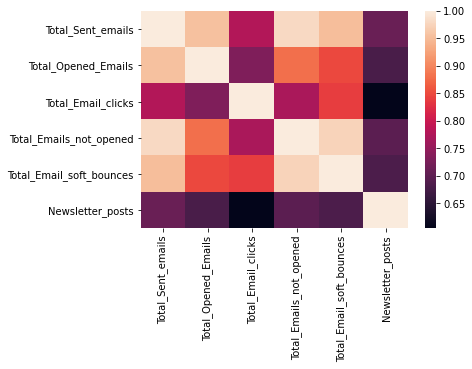

In [43]:
corrs = df[['Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'Newsletter_posts' ]].corr()
sns.heatmap(corrs)

In [44]:
#-------Newsletters--------
#General Posts counts
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     26.79
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           3.73e-07
Time:                        13:45:51   Log-Likelihood:                -2779.5
No. Observations:                 373   AIC:                             5563.
Df Residuals:                     371   BIC:                             5571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.3143     21.876      5.408      0.000      75.298     161.330
Total_Email_clicks     0.5585      0.108      5.175      0.000       0.346       0.771
==============================================================================
Omnibus:                      543.377   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79895.750
Skew:                           7.539   Prob(JB):                         0.00
Kurtosis:                      73.096   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#General donation value
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.067
Model:                                 OLS   Adj. R-squared:                  0.064
Method:                      Least Squares   F-statistic:                     26.64
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           4.00e-07
Time:                             13:45:51   Log-Likelihood:                -4318.6
No. Observations:                      373   AIC:                             8641.
Df Residuals:                          371   BIC:                             8649.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7458.2316   1355.179      5.504      0.000    4793.437    1.01e+04
Total_Email_clicks    34.5044      6.685      5.162      0.000      21.360      47.649
==============================================================================
Omnibus:                      506.720   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48822.642
Skew:                           6.799   Prob(JB):                         0.00
Kurtosis:                      57.373   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Individual Donation count
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.068
Model:                                           OLS   Adj. R-squared:                  0.065
Method:                                Least Squares   F-statistic:                     26.94
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           3.47e-07
Time:                                       13:45:51   Log-Likelihood:                -2776.7
No. Observations:                                373   AIC:                             5557.
Df Residuals:                                    371   BIC:                             5565.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                116.7234     21.717      5.375      0.000      74.020     159.427
Total_Email_clicks     0.5560      0.107      5.190      0.000       0.345       0.767
==============================================================================
Omnibus:                      544.605   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81087.162
Skew:                           7.566   Prob(JB):                         0.00
Kurtosis:                      73.629   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Individual Donation value
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.072
Model:                                            OLS   Adj. R-squared:                  0.070
Method:                                 Least Squares   F-statistic:                     28.86
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           1.38e-07
Time:                                        13:45:51   Log-Likelihood:                -4295.8
No. Observations:                                 373   AIC:                             8596.
Df Residuals:                                     371   BIC:                             8604.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6826.5903   1275.044      5.354      0.000    4319.371    9333.809
Total_Email_clicks    33.7856      6.290      5.372      0.000      21.418      46.153
==============================================================================
Omnibus:                      516.532   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56521.355
Skew:                           6.983   Prob(JB):                         0.00
Kurtosis:                      61.666   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Organization Donation count
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.015
Model:                                       OLS   Adj. R-squared:                  0.012
Method:                            Least Squares   F-statistic:                     5.672
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):             0.0177
Time:                                   13:45:51   Log-Likelihood:                -1051.8
No. Observations:                            373   AIC:                             2108.
Df Residuals:                                371   BIC:                             2115.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5908      0.213      7.468      0.000       1.172       2.010
Total_Email_clicks     0.0025      0.001      2.382      0.018       0.000       0.005
==============================================================================
Omnibus:                      478.126   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39659.715
Skew:                           6.164   Prob(JB):                         0.00
Kurtosis:                      51.988   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Organization Donation value
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.003
Model:                                         OLS   Adj. R-squared:                 -0.000
Method:                              Least Squares   F-statistic:                    0.9972
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):              0.319
Time:                                     13:45:51   Log-Likelihood:                -3487.3
No. Observations:                              373   AIC:                             6979.
Df Residuals:                                  371   BIC:                             6986.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                631.6413    145.920      4.329      0.000     344.707     918.575
Total_Email_clicks     0.7188      0.720      0.999      0.319      -0.697       2.134
==============================================================================
Omnibus:                      625.232   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191029.043
Skew:                           9.576   Prob(JB):                         0.00
Kurtosis:                     112.200   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##KANTAR


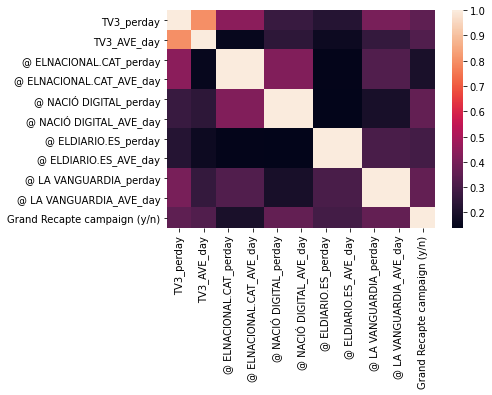

In [50]:
corr_kantar = df[['TV3_perday', 'TV3_AVE_day',
       '@ ELNACIONAL.CAT_perday', '@ ELNACIONAL.CAT_AVE_day',
       '@ NACIÓ DIGITAL_perday', '@ NACIÓ DIGITAL_AVE_day',
       '@ ELDIARIO.ES_perday', '@ ELDIARIO.ES_AVE_day',
       '@ LA VANGUARDIA_perday', '@ LA VANGUARDIA_AVE_day', 'Grand Recapte campaign (y/n)']].corr()

sns.heatmap(corr_kantar)

In [51]:
#-------KANTAR--------
#General Posts counts
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     77.77
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.86e-55
Time:                        13:45:51   Log-Likelihood:                -2657.7
No. Observations:                 373   AIC:                             5327.
Df Residuals:                     367   BIC:                             5351.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       48.3296     16.649      2.903      0.004      15.591      81.068
TV3_perday                 372.3232     43.288      8.601      0.000     287.199     457.447
@ ELNACIONAL.CAT_AVE_day     0.0132      0.008      1.634      0.103      -0.003       0.029
@ NACIÓ DIGITAL_AVE_day      0.0465      0.008      5.799      0.000       0.031       0.062
@ ELDIARIO.ES_AVE_day       -0.0034      0.001     -3.263      0.001      -0.005      -0.001
@ LA VANGUARDIA_AVE_day      0.0045      0.001      8.461      0.000       0.003       0.006
==============================================================================
Omnibus:                      424.511   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42042.034
Skew:                           4.857   Prob(JB):                         0.00
Kurtosis:                      54.096   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#General donation value
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.515
Model:                                 OLS   Adj. R-squared:                  0.508
Method:                      Least Squares   F-statistic:                     77.92
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           1.55e-55
Time:                             13:45:51   Log-Likelihood:                -4196.6
No. Observations:                      373   AIC:                             8405.
Df Residuals:                          367   BIC:                             8429.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2991.5961   1030.660      2.903      0.004     964.856    5018.336
TV3_perday                 2.22e+04   2679.846      8.283      0.000    1.69e+04    2.75e+04
@ ELNACIONAL.CAT_AVE_day     0.7887      0.500      1.576      0.116      -0.195       1.773
@ NACIÓ DIGITAL_AVE_day      3.3139      0.496      6.681      0.000       2.339       4.289
@ ELDIARIO.ES_AVE_day       -0.2051      0.065     -3.159      0.002      -0.333      -0.077
@ LA VANGUARDIA_AVE_day      0.2692      0.033      8.171      0.000       0.204       0.334
==============================================================================
Omnibus:                      344.415   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15301.288
Skew:                           3.669   Prob(JB):                         0.00
Kurtosis:                      33.507   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Individual Donation count
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.514
Model:                                           OLS   Adj. R-squared:                  0.507
Method:                                Least Squares   F-statistic:                     77.63
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           2.20e-55
Time:                                       13:45:51   Log-Likelihood:                -2655.2
No. Observations:                                373   AIC:                             5322.
Df Residuals:                                    367   BIC:                             5346.
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.4099     16.538      2.867      0.004      14.888      79.932
TV3_perday                 370.0261     43.002      8.605      0.000     285.465     454.587
@ ELNACIONAL.CAT_AVE_day     0.0133      0.008      1.656      0.099      -0.002       0.029
@ NACIÓ DIGITAL_AVE_day      0.0459      0.008      5.769      0.000       0.030       0.062
@ ELDIARIO.ES_AVE_day       -0.0034      0.001     -3.272      0.001      -0.005      -0.001
@ LA VANGUARDIA_AVE_day      0.0045      0.001      8.442      0.000       0.003       0.006
==============================================================================
Omnibus:                      427.140   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43215.591
Skew:                           4.902   Prob(JB):                         0.00
Kurtosis:                      54.812   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#Individual Donation value
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.515
Model:                                            OLS   Adj. R-squared:                  0.508
Method:                                 Least Squares   F-statistic:                     77.90
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           1.59e-55
Time:                                        13:45:51   Log-Likelihood:                -4174.9
No. Observations:                                 373   AIC:                             8362.
Df Residuals:                                     367   BIC:                             8385.
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2706.8561    972.472      2.783      0.006     794.539    4619.173
TV3_perday                2.131e+04   2528.551      8.428      0.000    1.63e+04    2.63e+04
@ ELNACIONAL.CAT_AVE_day     0.8705      0.472      1.844      0.066      -0.058       1.799
@ NACIÓ DIGITAL_AVE_day      2.9750      0.468      6.357      0.000       2.055       3.895
@ ELDIARIO.ES_AVE_day       -0.1986      0.061     -3.242      0.001      -0.319      -0.078
@ LA VANGUARDIA_AVE_day      0.2503      0.031      8.051      0.000       0.189       0.311
==============================================================================
Omnibus:                      369.587   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21728.779
Skew:                           4.005   Prob(JB):                         0.00
Kurtosis:                      39.523   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#Organization Donation count
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.343
Model:                                       OLS   Adj. R-squared:                  0.334
Method:                            Least Squares   F-statistic:                     38.35
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           1.23e-31
Time:                                   13:45:51   Log-Likelihood:                -976.24
No. Observations:                            373   AIC:                             1964.
Df Residuals:                                367   BIC:                             1988.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9197      0.183      5.012      0.000       0.559       1.280
TV3_perday                   2.2971      0.477      4.815      0.000       1.359       3.235
@ ELNACIONAL.CAT_AVE_day -8.976e-05   8.91e-05     -1.008      0.314      -0.000    8.54e-05
@ NACIÓ DIGITAL_AVE_day      0.0005   8.83e-05      6.198      0.000       0.000       0.001
@ ELDIARIO.ES_AVE_day    -1.307e-05   1.16e-05     -1.131      0.259   -3.58e-05    9.66e-06
@ LA VANGUARDIA_AVE_day   4.006e-05   5.87e-06      6.829      0.000    2.85e-05    5.16e-05
==============================================================================
Omnibus:                      419.413   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31227.684
Skew:                           4.886   Prob(JB):                         0.00
Kurtosis:                      46.747   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Organization Donation value
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_AVE_day',
'@ NACIÓ DIGITAL_AVE_day',
'@ ELDIARIO.ES_AVE_day',
'@ LA VANGUARDIA_AVE_day']])
model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.173
Model:                                         OLS   Adj. R-squared:                  0.161
Method:                              Least Squares   F-statistic:                     15.32
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           1.10e-13
Time:                                     13:45:51   Log-Likelihood:                -3452.4
No. Observations:                              373   AIC:                             6917.
Df Residuals:                                  367   BIC:                             6940.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      284.7400    140.182      2.031      0.043       9.079     560.401
TV3_perday                 884.6761    364.491      2.427      0.016     167.922    1601.430
@ ELNACIONAL.CAT_AVE_day    -0.0818      0.068     -1.203      0.230      -0.216       0.052
@ NACIÓ DIGITAL_AVE_day      0.3389      0.067      5.023      0.000       0.206       0.472
@ ELDIARIO.ES_AVE_day       -0.0065      0.009     -0.732      0.465      -0.024       0.011
@ LA VANGUARDIA_AVE_day      0.0189      0.004      4.224      0.000       0.010       0.028
==============================================================================
Omnibus:                      588.704   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140506.647
Skew:                           8.572   Prob(JB):                         0.00
Kurtosis:                      96.524   Cond. No.                     9.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
list(model1.params)

[284.73996680510163,
 884.6760545962941,
 -0.08183428024301223,
 0.3388696217530356,
 -0.006465715754400782,
 0.0189281886945189]

##All promotions

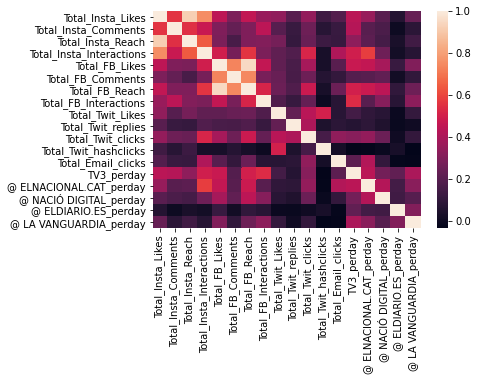

In [58]:
corrs = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']].corr()

sns.heatmap(corrs)

In [59]:
#-------General----------
#General Posts counts
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     48.19
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           7.66e-79
Time:                        13:45:52   Log-Likelihood:                -2577.5
No. Observations:                 373   AIC:                             5189.
Df Residuals:                     356   BIC:                             5256.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.6106     14.397      0.320      0.749     -23.703      32.924
Total_Insta_Likes            1.4457      0.518      2.790      0.006       0.427       2.465
Total_Insta_Comments       -12.8887      6.014     -2.143      0.033     -24.716      -1.061
Total_Insta_Interactions     2.0454      1.758      1.163      0.245      -1.413       5.503
Total_FB_Likes               2.7686      0.607      4.561      0.000       1.575       3.963
Total_FB_Comments          -22.6513      9.919     -2.284      0.023     -42.158      -3.145
Total_FB_Interactions        0.7918      0.652      1.214      0.226      -0.491       2.074
Total_Twit_Likes             1.7304      1.720      1.006      0.315      -1.653       5.114
Total_Twit_replies         -17.1727     15.960     -1.076      0.283     -48.561      14.215
Total_Twit_clicks           24.6136      4.116      5.980      0.000      16.519      32.708
Total_Twit_hashclicks      -58.5660     33.320     -1.758      0.080    -124.095       6.963
Total_Email_clicks           0.1939      0.075      2.571      0.011       0.046       0.342
TV3_perday                 162.5101     43.993      3.694      0.000      75.991     249.029
@ ELNACIONAL.CAT_perday   -182.2504     61.405     -2.968      0.003    -303.013     -61.488
@ NACIÓ DIGITAL_perday     135.9766     28.949      4.697      0.000      79.044     192.909
@ ELDIARIO.ES_perday       -74.7085     29.444     -2.537      0.012    -132.614     -16.803
@ LA VANGUARDIA_perday     292.6845     32.516      9.001      0.000     228.736     356.633
==============================================================================
Omnibus:                      356.200   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28952.706
Skew:                           3.621   Prob(JB):                         0.00
Kurtosis:                      45.549   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#General donation value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_values, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.686
Model:                                 OLS   Adj. R-squared:                  0.672
Method:                      Least Squares   F-statistic:                     48.70
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           2.17e-79
Time:                             13:45:52   Log-Likelihood:                -4115.2
No. Observations:                      373   AIC:                             8264.
Df Residuals:                          356   BIC:                             8331.
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      346.2946    888.499      0.390      0.697   -1401.071    2093.660
Total_Insta_Likes          105.1260     31.979      3.287      0.001      42.235     168.017
Total_Insta_Comments     -1247.4134    371.147     -3.361      0.001   -1977.329    -517.498
Total_Insta_Interactions   119.3163    108.512      1.100      0.272     -94.090     332.722
Total_FB_Likes             178.5979     37.465      4.767      0.000     104.918     252.278
Total_FB_Comments        -1766.0207    612.122     -2.885      0.004   -2969.850    -562.191
Total_FB_Interactions      121.3019     40.248      3.014      0.003      42.148     200.456
Total_Twit_Likes            90.8357    106.168      0.856      0.393    -117.960     299.632
Total_Twit_replies        -964.9422    984.973     -0.980      0.328   -2902.040     972.155
Total_Twit_clicks         1351.2064    253.999      5.320      0.000     851.679    1850.734
Total_Twit_hashclicks    -3205.3519   2056.363     -1.559      0.120   -7249.498     838.794
Total_Email_clicks          12.6469      4.655      2.717      0.007       3.493      21.801
TV3_perday                8298.9762   2715.030      3.057      0.002    2959.463    1.36e+04
@ ELNACIONAL.CAT_perday   -1.04e+04   3789.608     -2.745      0.006   -1.79e+04   -2951.213
@ NACIÓ DIGITAL_perday    9845.4034   1786.575      5.511      0.000    6331.837    1.34e+04
@ ELDIARIO.ES_perday     -4354.3869   1817.130     -2.396      0.017   -7928.045    -780.729
@ LA VANGUARDIA_perday    1.648e+04   2006.748      8.215      0.000    1.25e+04    2.04e+04
==============================================================================
Omnibus:                      256.695   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8655.223
Skew:                           2.372   Prob(JB):                         0.00
Kurtosis:                      26.117   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#Individual donations count
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_indiv_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.684
Model:                                           OLS   Adj. R-squared:                  0.670
Method:                                Least Squares   F-statistic:                     48.12
Date:                               Wed, 15 Sep 2021   Prob (F-statistic):           9.08e-79
Time:                                       13:45:52   Log-Likelihood:                -2575.1
No. Observations:                                373   AIC:                             5184.
Df Residuals:                                    356   BIC:                             5251.
Df Model:                                         16                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.9647     14.302      0.277      0.782     -24.162      32.091
Total_Insta_Likes            1.4179      0.515      2.755      0.006       0.406       2.430
Total_Insta_Comments       -12.5818      5.974     -2.106      0.036     -24.331      -0.833
Total_Insta_Interactions     2.0777      1.747      1.190      0.235      -1.357       5.513
Total_FB_Likes               2.7193      0.603      4.509      0.000       1.533       3.905
Total_FB_Comments          -21.9823      9.853     -2.231      0.026     -41.360      -2.605
Total_FB_Interactions        0.7695      0.648      1.188      0.236      -0.505       2.044
Total_Twit_Likes             1.7201      1.709      1.007      0.315      -1.641       5.081
Total_Twit_replies         -17.2000     15.855     -1.085      0.279     -48.381      13.981
Total_Twit_clicks           24.5746      4.089      6.011      0.000      16.534      32.615
Total_Twit_hashclicks      -58.2023     33.101     -1.758      0.080    -123.300       6.895
Total_Email_clicks           0.1923      0.075      2.567      0.011       0.045       0.340
TV3_perday                 161.7830     43.703      3.702      0.000      75.835     247.732
@ ELNACIONAL.CAT_perday   -180.3264     61.000     -2.956      0.003    -300.292     -60.360
@ NACIÓ DIGITAL_perday     134.2905     28.758      4.670      0.000      77.734     190.847
@ ELDIARIO.ES_perday       -74.4079     29.250     -2.544      0.011    -131.932     -16.884
@ LA VANGUARDIA_perday     290.9591     32.302      9.007      0.000     227.432     354.486
==============================================================================
Omnibus:                      359.268   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29831.959
Skew:                           3.667   Prob(JB):                         0.00
Kurtosis:                      46.194   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Individual donations value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_indiv_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.690
Model:                                            OLS   Adj. R-squared:                  0.676
Method:                                 Least Squares   F-statistic:                     49.43
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           3.65e-80
Time:                                        13:45:52   Log-Likelihood:                -4091.6
No. Observations:                                 373   AIC:                             8217.
Df Residuals:                                     356   BIC:                             8284.
Df Model:                                          16                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      146.1631    834.022      0.175      0.861   -1494.067    1786.393
Total_Insta_Likes           90.5767     30.018      3.017      0.003      31.542     149.612
Total_Insta_Comments     -1014.6582    348.391     -2.912      0.004   -1699.821    -329.496
Total_Insta_Interactions   144.4399    101.859      1.418      0.157     -55.882     344.762
Total_FB_Likes             158.1438     35.168      4.497      0.000      88.981     227.306
Total_FB_Comments        -1439.6433    574.591     -2.506      0.013   -2569.663    -309.624
Total_FB_Interactions       85.0857     37.781      2.252      0.025      10.785     159.387
Total_Twit_Likes            88.5586     99.659      0.889      0.375    -107.436     284.553
Total_Twit_replies        -945.4809    924.582     -1.023      0.307   -2763.810     872.848
Total_Twit_clicks         1369.0937    238.426      5.742      0.000     900.194    1837.994
Total_Twit_hashclicks    -3040.0786   1930.282     -1.575      0.116   -6836.268     756.110
Total_Email_clicks          11.9799      4.369      2.742      0.006       3.387      20.573
TV3_perday                8399.4401   2548.564      3.296      0.001    3387.306    1.34e+04
@ ELNACIONAL.CAT_perday  -9986.9978   3557.258     -2.807      0.005    -1.7e+04   -2991.117
@ NACIÓ DIGITAL_perday    8890.7076   1677.035      5.301      0.000    5592.566    1.22e+04
@ ELDIARIO.ES_perday     -4241.2643   1705.717     -2.486      0.013   -7595.812    -886.716
@ LA VANGUARDIA_perday    1.601e+04   1883.709      8.501      0.000    1.23e+04    1.97e+04
==============================================================================
Omnibus:                      290.896   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13400.935
Skew:                           2.764   Prob(JB):                         0.00
Kurtosis:                      31.839   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#Organization donations value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_emp_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.506
Model:                                       OLS   Adj. R-squared:                  0.484
Method:                            Least Squares   F-statistic:                     22.79
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           3.56e-45
Time:                                   13:45:52   Log-Likelihood:                -923.13
No. Observations:                            373   AIC:                             1880.
Df Residuals:                                356   BIC:                             1947.
Df Model:                                     16                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6459      0.171      3.786      0.000       0.310       0.981
Total_Insta_Likes            0.0278      0.006      4.528      0.000       0.016       0.040
Total_Insta_Comments        -0.3069      0.071     -4.307      0.000      -0.447      -0.167
Total_Insta_Interactions    -0.0323      0.021     -1.552      0.121      -0.073       0.009
Total_FB_Likes               0.0494      0.007      6.864      0.000       0.035       0.064
Total_FB_Comments           -0.6690      0.118     -5.692      0.000      -0.900      -0.438
Total_FB_Interactions        0.0223      0.008      2.881      0.004       0.007       0.037
Total_Twit_Likes             0.0103      0.020      0.504      0.614      -0.030       0.050
Total_Twit_replies           0.0273      0.189      0.144      0.885      -0.345       0.399
Total_Twit_clicks            0.0390      0.049      0.800      0.424      -0.057       0.135
Total_Twit_hashclicks       -0.3637      0.395     -0.921      0.358      -1.140       0.413
Total_Email_clicks           0.0016      0.001      1.761      0.079      -0.000       0.003
TV3_perday                   0.7271      0.521      1.395      0.164      -0.298       1.752
@ ELNACIONAL.CAT_perday     -1.9240      0.728     -2.644      0.009      -3.355      -0.493
@ NACIÓ DIGITAL_perday       1.6862      0.343      4.915      0.000       1.012       2.361
@ ELDIARIO.ES_perday        -0.3005      0.349     -0.861      0.390      -0.987       0.386
@ LA VANGUARDIA_perday       1.7254      0.385      4.478      0.000       0.968       2.483
==============================================================================
Omnibus:                      299.185   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8034.339
Skew:                           3.116   Prob(JB):                         0.00
Kurtosis:                      24.866   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#Organization donations value
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_emp_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.314
Model:                                         OLS   Adj. R-squared:                  0.284
Method:                              Least Squares   F-statistic:                     10.20
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           2.89e-21
Time:                                     13:45:52   Log-Likelihood:                -3417.4
No. Observations:                              373   AIC:                             6869.
Df Residuals:                                  356   BIC:                             6935.
Df Model:                                       16                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      200.1315    136.821      1.463      0.144     -68.947     469.210
Total_Insta_Likes           14.5493      4.924      2.955      0.003       4.865      24.234
Total_Insta_Comments      -232.7552     57.153     -4.072      0.000    -345.155    -120.355
Total_Insta_Interactions   -25.1236     16.710     -1.504      0.134     -57.986       7.739
Total_FB_Likes              20.4541      5.769      3.545      0.000       9.108      31.800
Total_FB_Comments         -326.3774     94.261     -3.462      0.001    -511.756    -140.999
Total_FB_Interactions       36.2162      6.198      5.843      0.000      24.027      48.405
Total_Twit_Likes             2.2771     16.349      0.139      0.889     -29.876      34.430
Total_Twit_replies         -19.4614    151.677     -0.128      0.898    -317.757     278.834
Total_Twit_clicks          -17.8872     39.114     -0.457      0.648     -94.810      59.035
Total_Twit_hashclicks     -165.2734    316.661     -0.522      0.602    -788.035     457.488
Total_Email_clicks           0.6669      0.717      0.930      0.353      -0.743       2.077
TV3_perday                -100.4640    418.090     -0.240      0.810    -922.700     721.772
@ ELNACIONAL.CAT_perday   -417.0478    583.565     -0.715      0.475   -1564.716     730.621
@ NACIÓ DIGITAL_perday     954.6958    275.116      3.470      0.001     413.639    1495.753
@ ELDIARIO.ES_perday      -113.1226    279.821     -0.404      0.686    -663.433     437.188
@ LA VANGUARDIA_perday     470.8738    309.021      1.524      0.128    -136.862    1078.610
==============================================================================
Omnibus:                      512.829   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78051.863
Skew:                           6.701   Prob(JB):                         0.00
Kurtosis:                      72.588   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

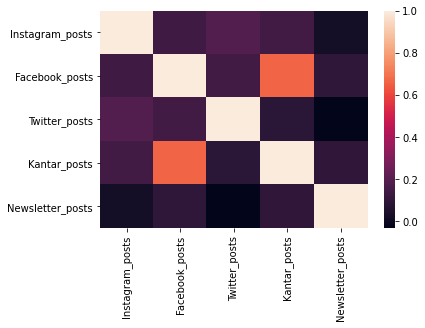

In [65]:
corrs = df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]].corr()

sns.heatmap(corrs)

In [66]:
#Organizations donations count
X = sm.add_constant(df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]])
model = sm.OLS(y_emp_posts, X).fit()
model.summary()
#'Total_Insta_Likes',
 #      'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
  #     'Total_Insta_Interactions', 'Total_FB_Likes', 'Total_FB_Comments',
   #    'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions',
    #   'Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
     #  'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
      # 'Total_Twit_hashclicks', 'Total_Sent_emails', 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.528
Model:                                       OLS   Adj. R-squared:                  0.521
Method:                            Least Squares   F-statistic:                     82.02
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           1.20e-57
Time:                                   13:45:53   Log-Likelihood:                -914.73
No. Observations:                            373   AIC:                             1841.
Df Residuals:                                367   BIC:                             1865.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4466      0.172      2.592      0.010       0.108       0.785
Instagram_posts      0.2423      0.305      0.793      0.428      -0.358       0.843
Facebook_posts       2.4219      0.229     10.593      0.000       1.972       2.871
Twitter_posts        0.0758      0.110      0.692      0.490      -0.140       0.291
Kantar_posts         0.0255      0.005      5.408      0.000       0.016       0.035
Newsletter_posts     0.5128      0.637      0.805      0.422      -0.741       1.766
==============================================================================
Omnibus:                      269.433   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9004.256
Skew:                           2.562   Prob(JB):                         0.00
Kurtosis:                      26.518   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Organizations donations value
X = sm.add_constant(df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']])
model = sm.OLS(y_emp_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.400
Model:                                         OLS   Adj. R-squared:                  0.392
Method:                              Least Squares   F-statistic:                     48.88
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           1.03e-38
Time:                                     13:45:53   Log-Likelihood:                -3392.6
No. Observations:                              373   AIC:                             6797.
Df Residuals:                                  367   BIC:                             6821.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.9175    132.226     -0.037      0.970    -264.934     255.099
Instagram_posts    123.2763    234.362      0.526      0.599    -337.585     584.137
Facebook_posts    1436.4678    175.466      8.187      0.000    1091.424    1781.512
Twitter_posts      -40.1694     84.076     -0.478      0.633    -205.500     125.162
Kantar_posts        16.0708      3.619      4.441      0.000       8.954      23.187
Newsletter_posts  -472.5409    489.209     -0.966      0.335   -1434.546     489.464
==============================================================================
Omnibus:                      512.427   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87346.135
Skew:                           6.630   Prob(JB):                         0.00
Kurtosis:                      76.785   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#Optimal combination (edited) - general
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ELDIARIO.ES_perday',
'@ LA VANGUARDIA_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     63.40
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           4.12e-81
Time:                        13:45:53   Log-Likelihood:                -2580.7
No. Observations:                 373   AIC:                             5187.
Df Residuals:                     360   BIC:                             5238.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9623     14.218      0.138      0.890     -25.999      29.924
Total_Insta_Likes           1.7994      0.368      4.894      0.000       1.076       2.522
Total_Insta_Comments      -12.8629      6.022     -2.136      0.033     -24.706      -1.020
Total_FB_Likes              2.8444      0.602      4.721      0.000       1.660       4.029
Total_FB_Comments         -23.3511      9.802     -2.382      0.018     -42.628      -4.074
Total_FB_Interactions       0.7570      0.651      1.163      0.245      -0.523       2.037
Total_Twit_clicks          24.9587      3.357      7.434      0.000      18.357      31.561
Total_Email_clicks          0.2073      0.075      2.776      0.006       0.060       0.354
TV3_perday                181.3724     43.087      4.209      0.000      96.638     266.106
@ ELNACIONAL.CAT_perday  -149.7811     56.094     -2.670      0.008    -260.094     -39.469
@ NACIÓ DIGITAL_perday    135.1322     28.857      4.683      0.000      78.382     191.882
@ ELDIARIO.ES_perday      -81.2927     29.392     -2.766      0.006    -139.094     -23.491
@ LA VANGUARDIA_perday    282.9501     30.029      9.423      0.000     223.896     342.005
==============================================================================
Omnibus:                      357.007   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29533.629
Skew:                           3.629   Prob(JB):                         0.00
Kurtosis:                      45.984   Cond. No.                         919.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Channel posts only (posts)
X = sm.add_constant(df[['Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar', 'Instagram_posts']])
model = sm.OLS(y_indiv_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.492
Model:                                            OLS   Adj. R-squared:                  0.485
Method:                                 Least Squares   F-statistic:                     71.17
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           6.31e-52
Time:                                        13:45:53   Log-Likelihood:                -4183.4
No. Observations:                                 373   AIC:                             8379.
Df Residuals:                                     367   BIC:                             8402.
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        -366.7395   1101.654     -0.333      0.739   -2533.086    1799.607
Facebook_posts                               7778.7863   1528.164      5.090      0.000    4773.729    1.08e+04
Twitter_posts                               -4099.2902   1119.614     -3.661      0.000   -6300.954   -1897.626
Kantar_posts                                  130.2916     30.151      4.321      0.000      71.001     189.582
Newsletter_posts                             5952.2807   3304.856      1.801      0.073    -546.550    1.25e+04
total_social_media_posts_on_day_excl_kantar  6210.3292    932.368      6.661      0.000    4376.876    8043.782
Instagram_posts                             -3421.4476   1823.914     -1.876      0.061   -7008.081     165.186
==============================================================================
Omnibus:                      394.522   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37109.420
Skew:                           4.273   Prob(JB):                         0.00
Kurtosis:                      51.111   Cond. No.                     6.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
#Channel posts only (posts)
X = sm.add_constant(df[['Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar', 'Instagram_posts']])
model = sm.OLS(y_emp_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.528
Model:                                       OLS   Adj. R-squared:                  0.521
Method:                            Least Squares   F-statistic:                     82.02
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           1.20e-57
Time:                                   13:45:53   Log-Likelihood:                -914.73
No. Observations:                            373   AIC:                             1841.
Df Residuals:                                367   BIC:                             1865.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.4466      0.172      2.592      0.010       0.108       0.785
Facebook_posts                                  1.7713      0.239      7.412      0.000       1.301       2.241
Twitter_posts                                  -0.5748      0.175     -3.283      0.001      -0.919      -0.230
Kantar_posts                                    0.0255      0.005      5.408      0.000       0.016       0.035
Newsletter_posts                               -0.1377      0.517     -0.266      0.790      -1.154       0.879
total_social_media_posts_on_day_excl_kantar     0.6505      0.146      4.462      0.000       0.364       0.937
Instagram_posts                                -0.4083      0.285     -1.431      0.153      -0.969       0.153
==============================================================================
Omnibus:                      269.433   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9004.256
Skew:                           2.562   Prob(JB):                         0.00
Kurtosis:                      26.518   Cond. No.                     6.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
list(model.params)

[0.4465981238651196,
 1.7713095251028297,
 -0.574779563438799,
 0.025500466708162577,
 -0.13771216537363853,
 0.6505480490730668,
 -0.40826974721731635]

In [72]:
#Channel posts only (value)
X = sm.add_constant(df[['Facebook_posts', 'Twitter_posts', 'Kantar_posts',
       'Newsletter_posts', 'total_social_media_posts_on_day_excl_kantar']])
model = sm.OLS(y_values, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.526
Model:                                 OLS   Adj. R-squared:                  0.519
Method:                      Least Squares   F-statistic:                     81.40
Date:                     Wed, 15 Sep 2021   Prob (F-statistic):           2.47e-57
Time:                             13:45:53   Log-Likelihood:                -4192.3
No. Observations:                      373   AIC:                             8397.
Df Residuals:                          367   BIC:                             8420.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        -371.6571   1128.403     -0.329      0.742   -2590.603    1847.289
Facebook_posts                               1.251e+04   2535.249      4.936      0.000    7527.987    1.75e+04
Twitter_posts                                -841.2883   2238.870     -0.376      0.707   -5243.912    3561.336
Kantar_posts                                  146.3624     30.883      4.739      0.000      85.632     207.092
Newsletter_posts                             8777.9110   4651.567      1.887      0.060    -369.158    1.79e+04
total_social_media_posts_on_day_excl_kantar  2912.1580   2000.019      1.456      0.146   -1020.777    6845.093
==============================================================================
Omnibus:                      360.693   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27183.305
Skew:                           3.733   Prob(JB):                         0.00
Kurtosis:                      44.150   Cond. No.                         243.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Optimal combination (edited)
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_clicks', 'Total_Email_clicks']])
model = sm.OLS(y_indiv_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.570
Model:                                            OLS   Adj. R-squared:                  0.562
Method:                                 Least Squares   F-statistic:                     69.06
Date:                                Wed, 15 Sep 2021   Prob (F-statistic):           4.83e-63
Time:                                        13:45:53   Log-Likelihood:                -4152.5
No. Observations:                                 373   AIC:                             8321.
Df Residuals:                                     365   BIC:                             8352.
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1199.8383    923.215      1.300      0.195    -615.650    3015.327
Total_Insta_Likes       143.6539     24.259      5.922      0.000      95.948     191.360
Total_Insta_Comments  -1205.9575    392.131     -3.075      0.002   -1977.076    -434.839
Total_FB_Likes          268.7457     36.271      7.409      0.000     197.419     340.072
Total_FB_Comments     -2698.3923    626.184     -4.309      0.000   -3929.773   -1467.012
Total_FB_Interactions   235.7297     39.710      5.936      0.000     157.640     313.819
Total_Twit_clicks      1505.6017    223.198      6.746      0.000    1066.687    1944.517
Total_Email_clicks        7.4201      4.623      1.605      0.109      -1.671      16.512
==============================================================================
Omnibus:                      393.547   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39542.478
Skew:                           4.225   Prob(JB):                         0.00
Kurtosis:                      52.728   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X = sm.add_constant(df[['Facebook_posts']])
model = sm.OLS(y_emp_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.486
Model:                                       OLS   Adj. R-squared:                  0.485
Method:                            Least Squares   F-statistic:                     350.8
Date:                           Wed, 15 Sep 2021   Prob (F-statistic):           1.43e-55
Time:                                   13:45:53   Log-Likelihood:                -930.51
No. Observations:                            373   AIC:                             1865.
Df Residuals:                                371   BIC:                             1873.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8007      0.159      5.033      0.000       0.488       1.113
Facebook_posts     3.2893      0.176     18.730      0.000       2.944       3.635
==============================================================================
Omnibus:                      244.064   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5848.820
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                      21.837   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X = sm.add_constant(df[['Facebook_posts']])
model = sm.OLS(y_emp_value, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.365
Model:                                         OLS   Adj. R-squared:                  0.363
Method:                              Least Squares   F-statistic:                     213.2
Date:                             Wed, 15 Sep 2021   Prob (F-statistic):           1.80e-38
Time:                                     13:45:53   Log-Likelihood:                -3403.1
No. Observations:                              373   AIC:                             6810.
Df Residuals:                                  371   BIC:                             6818.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            143.0748    120.368      1.189      0.235     -93.615     379.764
Facebook_posts  1940.4793    132.894     14.602      0.000    1679.159    2201.799
==============================================================================
Omnibus:                      524.379   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104926.514
Skew:                           6.855   Prob(JB):                         0.00
Kurtosis:                      84.014   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#To covid
X = sm.add_constant(df[['Sum of INGRESSATS_CRITIC']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     18.12
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           2.64e-05
Time:                        13:45:53   Log-Likelihood:                -2783.6
No. Observations:                 373   AIC:                             5571.
Df Residuals:                     371   BIC:                             5579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      232.1150     31.641      7.336      0.000     169.896     294.334
Sum of INGRESSATS_CRITIC    -0.4979      0.117     -4.256      0.000      -0.728      -0.268
==============================================================================
Omnibus:                      557.883   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86980.945
Skew:                           7.915   Prob(JB):                         0.00
Kurtosis:                      76.117   Cond. No.                         391.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Optimizing Channels

##Instagram

In [78]:
#Importing dataset with Instagram posts and attributes
df_insta = pd.read_csv('/content/insta_final_cmpgn.csv')

In [79]:
#Viewing columns to select relevant ones
df_insta.columns

Index(['Unnamed: 0', 'insta_id', 'Date', 'Post', 'Subtitle',
       'Loose donation link', 'Video', 'Donation link', 'Likes', 'Comments',
       'Total Interactions', 'Profile Visits',
       'Website Taps (on profile page)', 'Business Address Taps (in bio)',
       'Accounts Reached', 'Percentage not following BdA', 'Follows',
       'Hashtag in post (Y/N)', 'Hashtags in post', 'Emoji in post (Y/N)',
       'Number of Emojis', 'Link in post (Y/N)', 'Posted Link',
       'number of links in post', 'Collaboration (Y/N)', 'Collaboration',
       'Dominant Topic', 'Contribution %', 'Topic Terms',
       'Caption length (figures)', 'Campaign', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)'],
      dtype='object')

In [80]:
#Dropping irrelevant columns for this analysis
df_insta.drop(columns=['insta_id', 'Date', 'Post', 'Subtitle',
               'Comments', 'Total Interactions',
       'Profile Visits', 'Website Taps (on profile page)',
       'Business Address Taps (in bio)', 'Accounts Reached',
       'Percentage not following BdA', 'Follows','Posted Link',
       'Collaboration', 'Contribution %', 'Topic Terms', 'Hashtags in post'], inplace = True)
df_insta.columns

Index(['Unnamed: 0', 'Loose donation link', 'Video', 'Donation link', 'Likes',
       'Hashtag in post (Y/N)', 'Emoji in post (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'number of links in post', 'Collaboration (Y/N)',
       'Dominant Topic', 'Caption length (figures)', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)'],
      dtype='object')

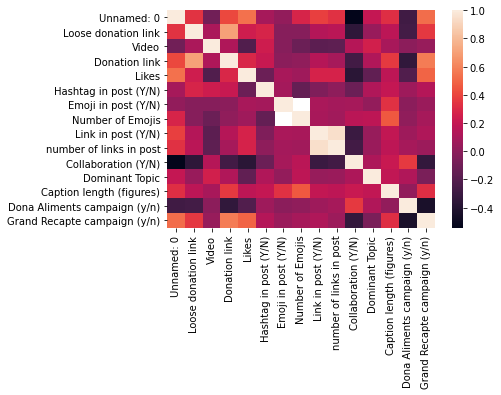

In [81]:
#Checking for multicollinearity
corrs = df_insta.corr()
sns.heatmap(corrs)

In [82]:
#Filling NaNs with 0s
df_insta = df_insta.fillna(0)

In [83]:
#Defining dependent and independent variables
y_insta = df_insta['Likes']
X_insta = sm.add_constant(df_insta[[
       'Hashtag in post (Y/N)', 
       'Collaboration (Y/N)','Caption length (figures)']])

In [84]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_insta, X_insta).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Likes   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     6.711
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           0.000588
Time:                        13:47:15   Log-Likelihood:                -336.63
No. Observations:                  61   AIC:                             681.3
Df Residuals:                      57   BIC:                             689.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       85.0127     21.670      3.923      0.000      41.619     128.406
Hashtag in post (Y/N)      -35.2857     17.426     -2.025      0.048     -70.180      -0.391
Collaboration (Y/N)        -66.4392     16.726     -3.972      0.000     -99.933     -32.945
Caption length (figures)     0.1511      0.055      2.753      0.008       0.041       0.261
==============================================================================
Omnibus:                       47.948   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.771
Skew:                           2.295   Prob(JB):                     3.38e-40
Kurtosis:                      10.102   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Facebook

In [85]:
#Importing dataset with Instagram posts and attributes
df_fb = pd.read_csv('/content/fb_final_cmpgn.csv')

In [86]:
#Viewing columns to select relevant ones
df_fb.head(5)
df_fb['Hour of post'] = [int(hr[:2]) for hr in df_fb['Post hour']]

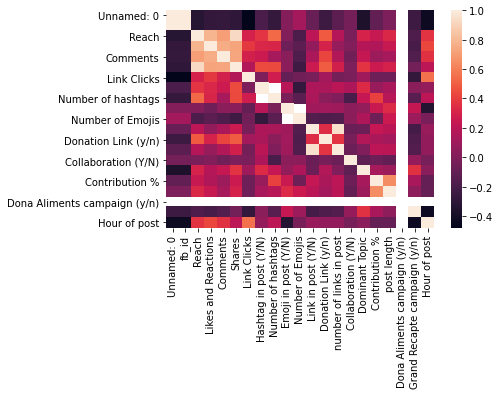

In [87]:
#Checking for multicollinearity
corrs = df_fb.corr()
sns.heatmap(corrs)


In [88]:
#Dropping irrelevant columns for this analysis
df_fb.drop(columns=['Reach', 'Comments', 'Shares',
                    'Contribution %', 'Topic Terms', 'Collaboration',
                    'Hashtags in post','Posted Link'], inplace = True)
df_fb.columns

Index(['Unnamed: 0', 'fb_id', 'Caption', 'Post time', 'Post hour',
       'Likes and Reactions', 'Link Clicks', 'Hashtag in post (Y/N)',
       'Number of hashtags', 'Emoji in post (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (y/n)', 'number of links in post',
       'Collaboration (Y/N)', 'Dominant Topic', 'post length', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Hour of post'],
      dtype='object')

In [89]:
#Filling NaNs with 0s
df_fb = df_fb.fillna(0)

In [90]:
#One-hot encoding dominant topic
df_fb = pd.concat([df_fb,pd.get_dummies(df_fb['Dominant Topic'], prefix='topic')],axis=1)

#dropping the original column
df_fb.drop(['Dominant Topic'],axis=1, inplace=True)

In [91]:
df_fb.columns

Index(['Unnamed: 0', 'fb_id', 'Caption', 'Post time', 'Post hour',
       'Likes and Reactions', 'Link Clicks', 'Hashtag in post (Y/N)',
       'Number of hashtags', 'Emoji in post (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (y/n)', 'number of links in post',
       'Collaboration (Y/N)', 'post length', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Hour of post', 'topic_0.0', 'topic_1.0', 'topic_2.0', 'topic_3.0',
       'topic_4.0'],
      dtype='object')

In [92]:
#Defining dependent and independent variables
y_fb = df_fb['Link Clicks'] #See SM_to_dons analysis above
X_fb = df_fb[['Hour of post', 'Likes and Reactions',
       'Hashtag in post (Y/N)', 'Number of hashtags', 'Number of Emojis', 'Link in post (Y/N)', 'Donation Link (y/n)', 'number of links in post'
       , 'post length', 'topic_0.0', 'topic_1.0', 'topic_2.0', 'topic_3.0',
       'topic_4.0' ]]

In [93]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_fb, X_fb).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Link Clicks   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     4.435
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           8.10e-06
Time:                        13:47:16   Log-Likelihood:                -564.11
No. Observations:                 108   AIC:                             1156.
Df Residuals:                      94   BIC:                             1194.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Hour of post               21.3083      4.311      4.942      0.000      12.748      29.869
Likes and Reactions         0.2103      0.097      2.159      0.033       0.017       0.404
Hashtag in post (Y/N)     -11.8098     23.854     -0.495      0.622     -59.172      35.553
Number of hashtags          0.9950     11.094      0.090      0.929     -21.033      23.023
Number of Emojis            3.8941      7.219      0.539      0.591     -10.439      18.227
Link in post (Y/N)          1.2944     44.886      0.029      0.977     -87.828      90.417
Donation Link (y/n)         2.7816     21.969      0.127      0.900     -40.838      46.401
number of links in post   -11.4319     39.914     -0.286      0.775     -90.682      67.818
post length                -0.0231      0.033     -0.699      0.486      -0.089       0.042
topic_0.0                  23.2791      9.586      2.429      0.017       4.246      42.312
topic_1.0                  16.9695     15.148      1.120      0.265     -13.108      47.047
topic_2.0                  23.2905     18.068      1.289      0.201     -12.583      59.164
topic_3.0                  44.5250     20.821      2.138      0.035       3.185      85.865
topic_4.0                  22.8394     19.082      1.197      0.234     -15.048      60.727
==============================================================================
Omnibus:                       80.464   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.471
Skew:                           2.406   Prob(JB):                    3.71e-134
Kurtosis:                      13.649   Cond. No.                     4.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Twitter

In [94]:
#Importing dataset with Instagram posts and attributes
df_twit = pd.read_csv('/content/twit_final_cmpgn.csv')

In [95]:
#Viewing columns to select relevant ones
df_twit.columns

Index(['Unnamed: 0', 'Tweet id', 'Tweet permalink', 'tweet_text', 'Post date',
       'Post hour', 'impressions', 'engagements', 'engagement rate',
       'retweets', 'replies', 'likes', 'user profile clicks', 'url clicks',
       'hashtag clicks', 'detail expands', 'permalink clicks', 'app opens',
       'app installs', 'follows', 'email tweet', 'dial phone', 'media views',
       'media engagements', 'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements', 'Promoted', 'Hashtag in post (Y/N)',
       'Number of hashtags', 'Hashtags in post', 'Coronavirus (Y/N)

In [96]:
#Dropping irrelevant columns for this analysis
df_twit.drop(columns=['Tweet id', 'Tweet permalink', 'tweet_text', 'Post date', 
                      'app opens', 'app installs',
                      'impressions', 'engagements', 'engagement rate', 'retweets', 'replies',
       'likes', 'user profile clicks', 'hashtag clicks',
       'detail expands', 'permalink clicks',
       'follows', 'email tweet', 'dial phone', 'media views',
       'media engagements', 'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements', 'Contribution %', 'Topic Terms',
       'Collaboration', 'Hashtags in post','Posted Link', 'Number of hashtags', 'Emoji in post (Y/N)'
       ], inplace = True)
df_twit.columns

Index(['Unnamed: 0', 'Post hour', 'url clicks', 'Promoted',
       'Hashtag in post (Y/N)', 'Coronavirus (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (Y/N)', 'number of links in post',
       'Collaboration (Y/N)', 'Dominant Topic', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)'],
      dtype='object')

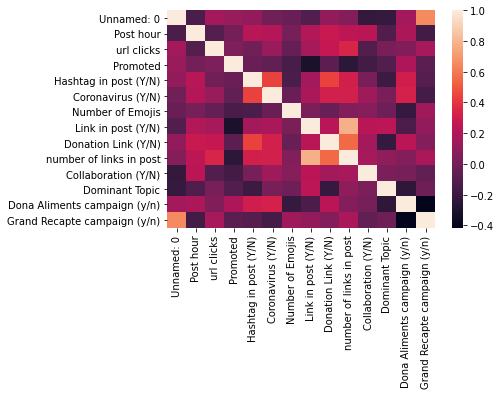

In [97]:
#Checking for multicollinearity
corrs = df_twit.corr()
sns.heatmap(corrs)

In [98]:
#Filling NaNs with 0s
df_twit = df_twit.fillna(0)

In [99]:
#One-hot encoding dominant topic
df_twit = pd.concat([df_twit,pd.get_dummies(df_twit['Dominant Topic'], prefix='topic')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df_twit.drop(['Dominant Topic'],axis=1, inplace=True)

In [100]:
df_twit.columns

Index(['Unnamed: 0', 'Post hour', 'url clicks', 'Promoted',
       'Hashtag in post (Y/N)', 'Coronavirus (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (Y/N)', 'number of links in post',
       'Collaboration (Y/N)', 'Campaign', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)', 'topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5'],
      dtype='object')

In [101]:
#Defining dependent and independent variables
y_twit = df_twit['url clicks']
X_twit = sm.add_constant(df_twit[['Post hour',
        'Promoted', 'Hashtag in post (Y/N)',
       'Donation Link (Y/N)', 'number of links in post',
       'Collaboration (Y/N)']])

In [102]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_twit, X_twit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             url clicks   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     12.35
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           3.78e-12
Time:                        13:47:17   Log-Likelihood:                -733.09
No. Observations:                 253   AIC:                             1480.
Df Residuals:                     246   BIC:                             1505.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.7728      0.911      3.043      0.003       0.978       4.567
Post hour                  -0.2100      0.069     -3.056      0.002      -0.345      -0.075
Promoted                    3.5043      1.786      1.962      0.051      -0.014       7.023
Hashtag in post (Y/N)      -1.8346      0.657     -2.790      0.006      -3.130      -0.540
Donation Link (Y/N)         3.1596      1.005      3.143      0.002       1.180       5.140
number of links in post     2.5381      0.475      5.340      0.000       1.602       3.474
Collaboration (Y/N)        -1.4601      0.589     -2.477      0.014      -2.621      -0.299
==============================================================================
Omnibus:                      274.991   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12565.004
Skew:                           4.426   Prob(JB):                         0.00
Kurtosis:                      36.370   Cond. No.                         84.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""